# A NOVEL INTERESTING CHALLENGE APPROPRIATE

# OVERALL TBD:
# yr_renovated as age since built/last touched
# Explore zip codes and formulas for regression implementation
# Clean up code starting with first cell down
# Comment back in plots when appropriate
# Walk score add on? Stretch goal.
# Models and visuals of iteration and comparison 
# Run model with outliers present to show difference
#
# PREPROCESS DATA

In [1]:
# Importing libraries

from math import sqrt
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#need to clean this up

# Reading in data and examining

In [2]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Looks like there's some NaN in the data, time for a null values and type check, null values in 'waterfront', 'view' and 'yr_renovated' features, objects in date and sqft_basement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

In [6]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

# View is predominately zero, meaning the house hasn't been viewed
# Transform view into categories.

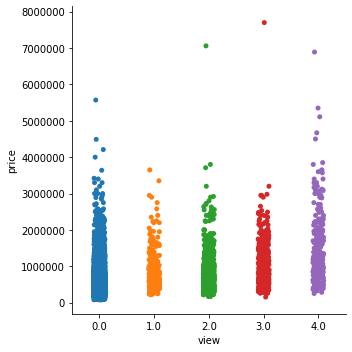

In [9]:
sns.catplot(x='view', y='price', data=df)

In [10]:
df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [11]:
df['view'] = df['view'].fillna(0).astype(int)

df['view'].value_counts(dropna=False)

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

# One hot encoding view into separate features

In [12]:
view_le = LabelEncoder()
view_labels = view_le.fit_transform(df['view'])
df['view_label'] = view_labels
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_label
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0


In [13]:
view_ohe = OneHotEncoder()
view_feature_arr = view_ohe.fit_transform(
                                df[['view_label']]).toarray()
view_feature_labels = ['view__'+str(cls_label) 
                           for cls_label in view_le.classes_]
view_features = pd.DataFrame(view_feature_arr, 
                            columns=view_feature_labels)

/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
df.reset_index(drop=True, inplace=True)
view_features.reset_index(drop=True, inplace=True)

In [15]:
df.drop('view_label', axis=1, inplace=True)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [17]:
view_features.head()

,view__0,view__1,view__2,view__3,view__4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df, view_features], axis=1)

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,98178,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,98125,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,98028,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,98136,47.5208,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,98074,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,98053,47.6561,-122.005,4760,101930,1.0,0.0,0.0,0.0,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,98003,47.3097,-122.327,2238,6819,1.0,0.0,0.0,0.0,0.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,98198,47.4095,-122.315,1650,9711,1.0,0.0,0.0,0.0,0.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,98146,47.5123,-122.337,1780,8113,1.0,0.0,0.0,0.0,0.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,98038,47.3684,-122.031,2390,7570,1.0,0.0,0.0,0.0,0.0


In [19]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
view__0          False
view__1          False
view__2          False
view__3          False
view__4          False
dtype: bool

# Waterfront is the next variable of interest - and mostly 0, so imputing NaN with 0s.

In [20]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [21]:
df['waterfront'] = df['waterfront'].fillna(0)

df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

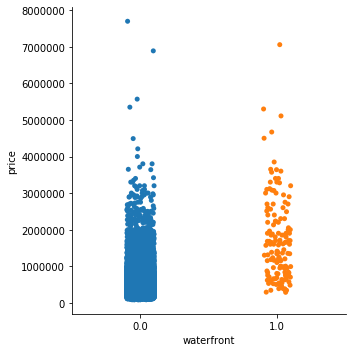

In [22]:
sns.catplot(x='waterfront', y='price', data=df)

In [23]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
view__0             0
view__1             0
view__2             0
view__3             0
view__4             0
dtype: int64

# Keeping yr_renovated, filling with 0s, creating new feature off of yr_renovated

In [24]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

In [25]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [26]:
df.yr_renovated.value_counts(dropna=False)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

# Extract only housing that was renovated, as well as the gap between building and renovation in years

In [27]:
# code to only get renovated housing, then create a feature of the gap between year built 
# and renovated, as well as was_renovated, whether or not housing was renovated at all
df['was_renovated'] = df['yr_renovated'].astype(bool).astype(int)
renovation_gap = df[(df['yr_renovated'] > 0)]
display(renovation_gap.head(10))
display(df.head(10))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0,...,47.6827,-122.310,1590,3264,1.0,0.0,0.0,0.0,0.0,1
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0,...,47.5873,-122.249,1950,6045,1.0,0.0,0.0,0.0,0.0,1
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0,...,47.5814,-122.196,2370,8113,1.0,0.0,0.0,0.0,0.0,1
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0,...,47.6141,-122.212,3060,11275,1.0,0.0,0.0,0.0,0.0,1
158,8029200135,11/13/2014,247000.0,3,2.00,1270,7198,1.5,0.0,0,...,47.2086,-121.996,1160,7198,1.0,0.0,0.0,0.0,0.0,1
209,6300000550,7/17/2014,464000.0,6,3.00,2300,3404,2.0,0.0,0,...,47.7067,-122.343,1560,1312,1.0,0.0,0.0,0.0,0.0,1
216,46100204,2/21/2015,1510000.0,5,3.00,3300,33474,1.0,0.0,3,...,47.5673,-122.210,3836,20953,0.0,0.0,0.0,1.0,0.0,1
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4,...,47.4497,-122.375,2030,13193,0.0,0.0,0.0,0.0,1.0,1
237,7228500560,3/20/2015,410000.0,4,1.00,1970,4740,1.5,0.0,0,...,47.6136,-122.303,1510,4740,1.0,0.0,0.0,0.0,0.0,1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,...,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,47.5208,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,47.6561,-122.005,4760,101930,1.0,0.0,0.0,0.0,0.0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,47.3097,-122.327,2238,6819,1.0,0.0,0.0,0.0,0.0,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,47.4095,-122.315,1650,9711,1.0,0.0,0.0,0.0,0.0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,47.5123,-122.337,1780,8113,1.0,0.0,0.0,0.0,0.0,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,47.3684,-122.031,2390,7570,1.0,0.0,0.0,0.0,0.0,0


In [28]:
df['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [29]:
renovation_gap['ren_gap'] = renovation_gap["yr_renovated"] - renovation_gap["yr_built"]

renovation_gap['ren_gap'].value_counts(dropna=False)

/Users/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


63.0     17
43.0     17
37.0     16
36.0     15
61.0     15
32.0     15
86.0     15
52.0     15
29.0     14
57.0     14
35.0     14
45.0     13
44.0     13
59.0     13
40.0     13
46.0     12
54.0     12
88.0     12
41.0     12
62.0     12
26.0     11
53.0     11
51.0     11
60.0     11
72.0     11
48.0     11
55.0     10
49.0     10
21.0      9
64.0      9
         ..
23.0      4
65.0      4
39.0      4
96.0      4
95.0      4
73.0      3
91.0      3
101.0     3
114.0     3
99.0      3
12.0      3
94.0      3
110.0     2
19.0      2
78.0      2
104.0     2
107.0     2
92.0      2
103.0     2
20.0      2
14.0      2
9.0       2
17.0      2
6.0       1
16.0      1
105.0     1
13.0      1
109.0     1
113.0     1
10.0      1
Name: ren_gap, Length: 103, dtype: int64

In [30]:
df['ren_gap'] = renovation_gap['ren_gap']


In [31]:
df['ren_gap'].value_counts(dropna=False)

NaN      20853
63.0        17
43.0        17
37.0        16
86.0        15
36.0        15
52.0        15
61.0        15
32.0        15
57.0        14
35.0        14
29.0        14
44.0        13
45.0        13
40.0        13
59.0        13
54.0        12
88.0        12
62.0        12
41.0        12
46.0        12
51.0        11
26.0        11
72.0        11
53.0        11
48.0        11
60.0        11
49.0        10
55.0        10
42.0         9
         ...  
39.0         4
83.0         4
96.0         4
95.0         4
27.0         4
99.0         3
94.0         3
101.0        3
114.0        3
12.0         3
73.0         3
91.0         3
103.0        2
92.0         2
9.0          2
78.0         2
17.0         2
19.0         2
14.0         2
104.0        2
20.0         2
110.0        2
107.0        2
16.0         1
6.0          1
10.0         1
105.0        1
113.0        1
13.0         1
109.0        1
Name: ren_gap, Length: 104, dtype: int64

In [32]:
df['ren_gap'] = df['ren_gap'].fillna(0)

df['ren_gap'].value_counts(dropna=False)

0.0      20853
63.0        17
43.0        17
37.0        16
86.0        15
36.0        15
52.0        15
61.0        15
32.0        15
57.0        14
35.0        14
29.0        14
44.0        13
45.0        13
40.0        13
59.0        13
54.0        12
88.0        12
62.0        12
41.0        12
46.0        12
51.0        11
26.0        11
72.0        11
53.0        11
48.0        11
60.0        11
49.0        10
55.0        10
42.0         9
         ...  
39.0         4
83.0         4
96.0         4
95.0         4
27.0         4
99.0         3
94.0         3
101.0        3
114.0        3
12.0         3
73.0         3
91.0         3
103.0        2
92.0         2
9.0          2
78.0         2
17.0         2
19.0         2
14.0         2
104.0        2
20.0         2
110.0        2
107.0        2
16.0         1
6.0          1
10.0         1
105.0        1
113.0        1
13.0         1
109.0        1
Name: ren_gap, Length: 104, dtype: int64

# Replace with renovation_gap df versions?

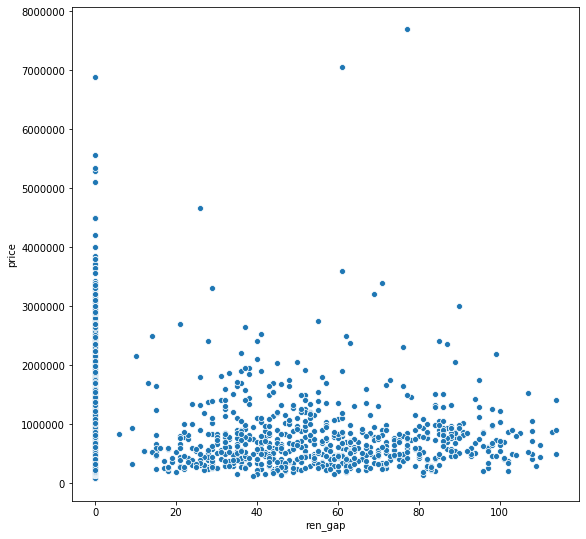

In [33]:
plt.figure(1, figsize=(20,20))
    
plt.subplot(2, 2,1)
sns.scatterplot(x='ren_gap', y='price', data=df)

# COMMENTS OF CONCLUSIONS ON PLOT

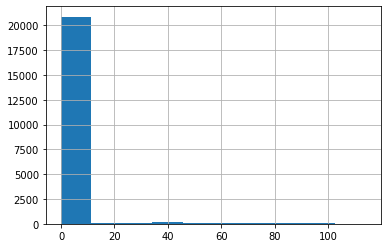

In [34]:
df['ren_gap'].hist()

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Dropping id as it provides no real analysis driving information

In [36]:
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,3,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Date dropped, to be revisited for time series analysis

In [37]:
df.drop('date', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Imputing 0s and converting to int sqft_basement, which is also mostly 0s.

In [39]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
266.0         1
516.0         1
3260.0        1
20.0          1
1770.0        1
2050.0        1
935.0         1
784.0         1
2360.0        1
1135.0        1
1284.0        1
1281.0        1
283.0         1
3500.0        1
248.0         1
2400.0        1
274.0         1
861.0         1
2190.0        1
652.0         1
1525.0        1
2810.0        1
508.0         1
1852.0        1
506.0         1
946.0         1
2720.0        1
556.0         1
2196.0        1
792.0         1
Name: sqft_basement, Len

In [40]:
df.sqft_basement[df.sqft_basement == "?"] = 0

df['sqft_basement'].value_counts()

/Users/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.0       12826
0           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
295.0         1
243.0         1
20.0          1
666.0         1
1284.0        1
2600.0        1
2190.0        1
652.0         1
1525.0        1
2720.0        1
508.0         1
1852.0        1
792.0         1
946.0         1
1245.0        1
2120.0        1
935.0         1
915.0         1
1990.0        1
875.0         1
2500.0        1
2730.0        1
266.0         1
1024.0        1
4820.0        1
588.0         1
1880.0        1
518.0         1
2610.0        1
2240.0        1
Name: sqft_basement, Len

In [41]:
df['sqft_basement'] = df['sqft_basement'].astype('float32').astype(int)

df['sqft_basement'].value_counts()

0       13280
600       217
500       209
700       208
800       201
400       184
1000      148
900       142
300       142
200       105
750       104
530       103
480       103
450       103
720        98
620        90
580        84
840        83
420        81
860        79
1100       78
670        78
780        76
550        76
650        75
240        74
380        73
680        73
850        72
360        72
        ...  
2610        1
2850        1
915         1
20          1
276         1
143         1
516         1
2190        1
1284        1
2180        1
2196        1
2500        1
2580        1
374         1
2360        1
518         1
4820        1
1798        1
1990        1
2310        1
295         1
935         1
415         1
248         1
792         1
1816        1
1880        1
1960        1
2120        1
1135        1
Name: sqft_basement, Length: 303, dtype: int64

# Creating boolean of has_basement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
view__0          21597 non-null float64
view__1          21597 non-null float64
view__2          21597 non-null float64
view__3          21597 non-null flo

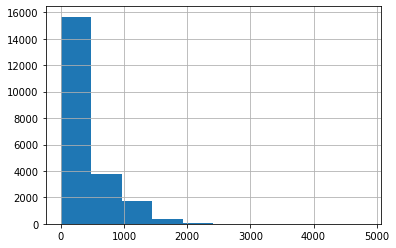

In [44]:
df['sqft_basement'].hist()

df.info()

df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [42]:
df['has_basement'].value_counts()

KeyError: 'has_basement'

In [ ]:
sns.catplot(x='has_basement', y='price', data=df)

# Question: What's the relative impact of years since a house was built, year renovated if it was renovated, years since renovations took place, and whether it was renovated or not on housing prices?

In [ ]:
sns.scatterplot(x="yr_built", y='price', data=df)

In [ ]:
sns.scatterplot(x="yr_renovated", y="price", data= renovation_gap)

In [ ]:
sns.scatterplot(x='ren_gap', y='price', data=renovation_gap)

In [ ]:
sns.catplot(x='was_renovated', y='price', data=df)

# Conclusions: When a house was built matters less than its renovation year if it was renovated when comparing to price, but it's not that important how many years since a house was built that it was renovated or whether or not it was.

# Question - how does living in the Seattle area effect prices?

In [ ]:
seattlezips = [98188,98199,98174,98154,98158,98164,98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98121,98122,98125,98126,98133,98134,98136,
98144]

df['seattle'] = df['zipcode'].apply(lambda i: 1 if i in seattlezips else 0)

In [ ]:
df.seattle.value_counts()

In [ ]:
sns.catplot(x='seattle', y='price', data=df)

# TBD: Conclusion on plot here, is catplot the right type? Waterfront should have some correlation, right?

# TBD: Geographical plotting

# Zipcode, lat and long are mostly useful for geospatial analysis, dropping them for now 

In [ ]:
df.drop(['lat', 'long'], axis=1, inplace=True)

df.head()

# QUESTION: Are there any other issues such as a predominance of 0s in the values of a column? - Bedrooms and Bathrooms look ordinal, as does floors and condition and grade

# TBD - PLOT HERE OF VALUE COUNTS

In [ ]:
for col in df:
    print(df[col].value_counts(dropna=False))

In [ ]:
df = pd.concat([df,pd.get_dummies(df['condition'], prefix='condition')],axis=1).drop(['condition'],axis=1)

df.head(10)

# Label encoding -> One Hot Encoding with bedrooms

In [ ]:
sns.catplot(x='bedrooms', y='price', data=df)

In [ ]:
house_le = LabelEncoder()
house_labels = house_le.fit_transform(df['bedrooms'])
df['bedroom_label'] = house_labels
df.head(10)

In [ ]:
house_ohe = OneHotEncoder()
house_feature_arr = house_ohe.fit_transform(
                                df[['bedroom_label']]).toarray()
house_feature_labels = ['bedroom__'+str(cls_label) 
                           for cls_label in house_le.classes_]
house_features = pd.DataFrame(house_feature_arr, 
                            columns=house_feature_labels)

In [ ]:
df.reset_index(drop=True, inplace=True)
house_features.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

In [ ]:
house_features.head()

In [ ]:
df = pd.concat([df, house_features], axis=1)

df.head(10)

In [ ]:
df.isna().any()

In [ ]:
df.head()

# Binning bathrooms into integers

In [ ]:
sns.catplot(x="bathrooms", y="price", data=df)

In [ ]:
bins = [0, 1,2,3,4,5]
df['binned'] = pd.cut(df['bathrooms'], bins,labels=False)

df.head(10)

In [ ]:
df.binned.value_counts(dropna=False)

In [ ]:
df['binned'] = df['binned'].fillna(df['binned'].median())

In [ ]:
df.isna().sum()

In [ ]:
df.binned.value_counts(dropna=False)

In [ ]:
df.bathrooms.value_counts()

In [ ]:
len(df.bathrooms)

In [ ]:
len(df.binned)

In [ ]:
df['bathrooms'].hist(bins=4)

In [ ]:
df['binned'].hist(bins=4)

In [ ]:
sns.catplot(x="binned", y="price", data=df)

# Encoding of Floors

In [ ]:
df = pd.concat([df,pd.get_dummies(df['floors'], prefix='floors')],axis=1).drop(['floors'],axis=1)

df.head(10)

In [ ]:
df.columns

# Encoding of zipcodes!

In [45]:
df = pd.concat([df,pd.get_dummies(df['zipcode'], prefix='zip')],axis=1).drop(['zipcode'],axis=1)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3,1.50,1060,9711,1.0,0.0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
8,229500.0,3,1.00,1780,7470,1.0,0.0,0,3,7,...,1,0,0,0,0,0,0,0,0,0
9,323000.0,3,2.50,1890,6560,2.0,0.0,0,3,7,...,0,0,0,0,0,0,0,0,0,0


# Examining data visually before trimming outliers

In [46]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    
    plt.tight_layout()
    plt.show()

# TBD: DO PLOTS FOR CATEGORICAL VS. NUMERICAL FEATURES AS DIFFERENT PLOTS FOR DISTRIBUTION BY THEMSELVES/AGAINST PRICE

In [48]:

for col in df.columns:
#     diagnostic_plots(df,col)

SyntaxError: unexpected EOF while parsing (<ipython-input-48-c08955927fee>, line 2)

# This plot is very finicky about number of features

In [ ]:
# #set figures large to be modified by tight_layout
# plt.figure(1, figsize=(20,20))

# #core function to create regplot(regression line fitted over scatterplot)
# def multi_scatter_plot(x):
#     #sns.regplot(df[x], df['price'])
#     sns.scatterplot(x, y="price", data=df)
    
# #iterating over dataframe minus redundant price column, adding subplots
# for index, col in enumerate(df.drop(['price'], axis=1).columns, start=1):
#     #adds subplot, using index to increment position of new subplot in a 5 column structure
#     plt.subplot(5, 5,index)
#     #call function to create plot
#     multi_scatter_plot(col)
    
# #tidy display for inline and show plot
# plt.tight_layout()
# plt.show()

# Question: What factors might be, without knowing how it's calculated, contributing to Grade of the housing?

In [ ]:
len(df.columns)

# Same plot idea as before, same issues with number of features.

In [ ]:
# #set figures large to be modified by tight_layout
# plt.figure(1, figsize=(20,20))

# #core function to create regplot(regression line fitted over scatterplot)
# def multi_scatter_plot(x):
#     #sns.regplot(df[x], df['price'])
#     sns.scatterplot(x, y="grade", data=df)
    
# #iterating over dataframe minus redundant price column, adding subplots
# for index, col in enumerate(df.drop(['grade'], axis=1).columns, start=1):
#     #adds subplot, using index to increment position of new subplot in a 5 column structure
#     plt.subplot(14, 14,index)
#     #call function to create plot
#     multi_scatter_plot(col)
    
# #tidy display for inline and show plot
# plt.tight_layout()
# plt.show()

# Looks like bathrooms, square feet of space in various ways, and amount of floors might impact the grade

# Question - bedrooms or bathrooms, which has more of an impact on prices?

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df)

In [ ]:
sns.scatterplot(x="bathrooms", y="price", data=df)

# Conclusion: Bathrooms seem to have a more direct relationship but it's worth revisiting this without the outliers especially in bedrooms

In [ ]:
df.columns

In [ ]:
cat_cols = ['view__0',
       'view__1', 'view__2', 'view__3', 'view__4','condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5','bedroom__1',
       'bedroom__2', 'bedroom__3', 'bedroom__4', 'bedroom__5', 'bedroom__6',
       'bedroom__7', 'bedroom__8', 'bedroom__9', 'bedroom__10', 'bedroom__11',
       'bedroom__33', 'binned', 'floors_1.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5']

# Outlier trimming

In [ ]:
col_trim = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'was_renovated', 'ren_gap', 'has_basement', 'seattle', 'bedroom_label'] 

In [ ]:
len(df)

In [ ]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [ ]:
len(df)

In [ ]:
df.bedroom__33.value_counts()

In [ ]:
col_trim = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'was_renovated', 'ren_gap', 'has_basement', 'seattle', 'bedroom_label'] 

for col in col_trim:
    print(col)
    idx = find_outliers(df[col])
    df = df.loc[idx==False]

In [ ]:
len(df)

In [ ]:
df.columns

# Examining values with outliers trimmed

# TBD ^

# Log transforming variables - question: which variables to transform? A: Only ones with extreme skew.

# Dropping all only 1s and only 0s columns

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]

df.columns

In [ ]:
display(df.columns)

In [ ]:
plt.figure(figsize=(30,30))
plt.tight_layout()
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'view__0', 'view__1', 'view__2',
       'has_basement', 'seattle', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'bedroom_label', 'bedroom__1',
       'bedroom__2', 'bedroom__3', 'bedroom__4', 'bedroom__5', 'binned',
       'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5']].corr(), cmap='coolwarm', annot=True);

In [ ]:
# for col in df.columns:
#     diagnostic_plots(df,col)

In [ ]:
for col in df[['price', 'bedrooms', 'bathrooms',
        'grade',
       'sqft_living15',]]:
    df[col] = np.log(df[col])
#     diagnostic_plots(df,col)

# TBD:Summary of correlation plot

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(30,30))
plt.tight_layout()
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'view__0', 'view__1', 'view__2',
       'has_basement', 'seattle', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'bedroom_label', 'bedroom__1',
       'bedroom__2', 'bedroom__3', 'bedroom__4', 'bedroom__5', 'binned',
       'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5']].corr(), cmap='coolwarm', annot=True);

In [ ]:
df.drop(['view','sqft_living15', 'sqft_lot15','sqft_above','bedroom_label', 'bedrooms', 'bathrooms', 'sqft_basement'], axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(30,30))
plt.tight_layout()
sns.heatmap(df[['price', 'sqft_living', 'sqft_lot', 'grade', 'yr_built', 'zipcode',
       'view__0', 'view__1', 'view__2', 'has_basement', 'seattle',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'bedroom__1', 'bedroom__2', 'bedroom__3', 'bedroom__4',
       'bedroom__5', 'binned', 'floors_1.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5']].corr(), cmap='coolwarm', annot=True);

In [ ]:
df.drop('bedroom__3', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
len(df.columns)

In [ ]:
df.columns

# Scaling with MinMax, TBD: add kde plots

In [ ]:
df.columns

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df[['price', 'sqft_living', 'sqft_lot',
       'grade', 'yr_built','binned']])
scaled_df = pd.DataFrame(scaled_df)

scaled_df.head(10)
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(df['x1'], ax=ax1)
# sns.kdeplot(df['x2'], ax=ax1)
# sns.kdeplot(df['x3'], ax=ax1)
# ax2.set_title('After Min-Max Scaling')
# sns.kdeplot(scaled_df['x1'], ax=ax2)
# sns.kdeplot(scaled_df['x2'], ax=ax2)
# sns.kdeplot(scaled_df['x3'], ax=ax2)
# plt.show()

# MODELING

# Modeling with Ordinary Least Squares with SM for better stats analysis of regression

In [ ]:
df.columns

In [ ]:
predictors = df.drop('price', axis=1)
target = df['price']


X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_fit = sm.OLS(y_train, x_train).fit()
results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()

In [ ]:
predictions = model_fit.predict(X_test)

In [ ]:
model_fit.conf_int()

# Predictions analysis

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

In [ ]:
sns.distplot(predictions)

# Exponentionally transforming back the log transform as its inverse transformation

In [ ]:
invert_log_pred = np.expm1(predictions)
invert_log_test= np.expm1(y_test)

In [ ]:
invert_log_train = np.expm1(y_train)

In [ ]:
plt.scatter(invert_log_test,invert_log_pred)
plt.xlabel('True Price - inverted log transform')
plt.ylabel('Predicted Price - inverted log transform')

# To Explore: Include more variables, maybe keep at lower thresholds of corr, do these need an inverse transform?
# Residual plotting - OUTLIER SPOTTED

In [ ]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

In [ ]:
sns.residplot(model_fit.resid, model_fit.fittedvalues)

# Stepwise forward-backward feature selection

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(predictors, target, verbose=True)
print('resulting features:')
print(result)

In [ ]:
df_stepwise = df[['grade', 'seattle', 'sqft_living', 'yr_built', 'zipcode', 'view__0', 'binned', 'condition_5', 'condition_4', 'bedroom__2', 'condition_3', 'sqft_lot', 'floors_3.0', 'floors_1.0', 'floors_2.5','price']]


df_stepwise.head(10)

# Model off of stepwise features

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_stepwise.drop('price', axis=1),
                                                    df_stepwise['price'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
    #fit model
model_fit = sm.OLS(y_train, x_train).fit()

    #store results in dataframe for easier analysis
#     results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()
    

In [ ]:
predictions = model_fit.predict(X_test)

In [ ]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

In [ ]:
sns.residplot(model_fit.resid, model_fit.fittedvalues)

In [ ]:
invert_log_pred = np.expm1(predictions)
invert_log_test= np.expm1(y_test)

In [ ]:
invert_log_train = np.expm1(y_train)

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(invert_log_test,invert_log_pred)
plt.xlabel('True Price - inverted log transform')
plt.ylabel('Predicted Price - inverted log transform')

In [ ]:
np.exp(model_fit.params)

In [ ]:
df.columns

In [ ]:
col_trim = ['price','sqft_living', 'sqft_lot',
        'grade','yr_built','has_basement', 'seattle', ] 


for col in col_trim:
    print(col)
    idx = find_outliers(df[col])
    df = df.loc[idx==False]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_stepwise.drop('price', axis=1),
                                                    df_stepwise['price'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
    #fit model
model_fit = sm.OLS(y_train, x_train).fit()

    #store results in dataframe for easier analysis
#     results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()
    

In [ ]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

In [ ]:
df_iteration1 = df_stepwise[['price','grade', 'yr_built', 'condition_3', 'condition_2', "floors_1.0", "bedroom__4", "bedroom__5"]]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_iteration1.drop('price', axis=1),
                                                    df_iteration1['price'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
    #fit model
model_fit = sm.OLS(y_train, x_train).fit()

    #store results in dataframe for easier analysis
#     results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()
    

# HERE IS WHERE CONCLUSIONS ON THE MAIN MODEL GO

# Looking to eliminate more multicolinearity

In [ ]:
# Attempted feature selection including recursive feature eliminator

# INCOMING TEXT DUMP OF MODELS, VISUALS LATER 

# Do bathrooms and bedrooms predict well price of housing?

In [ ]:
df.columns

# Which is more predictive, bedrooms or bathrooms?

# A model with a set of features around the general size of a dwelling

# A model concerning the quality of a dwelling

# Grade seems to be an overall strong predictor across models!

# Analyzing by high and low percentages of the price of housing and the most performant model - doesn't include outliers which weakens the point

In [ ]:
ninetyp = df.price.quantile(.9)

In [ ]:
ninetyp = df[df.price > df.price.quantile(.90)]

In [ ]:
ninetyp.columns

# Conclusion - performance drops off at the highest percentiles, steadily

# TBD - Make modeling up to .summary() a function passing in dataframe, 
# visuals incl. of comparing model results maybe, 
# feature engineer a 'last_worked_on' off yr built and renovated
# learn how to actually read statsmodel results other than R-squared
# practice making different dataframes when changing data that will be used later
# improve model with feature selection methods and feature engineering zip codes

# STORYTELL

# OVERALL CONCLUSIONS GO HERE:

# Future work 
I'd like to explore time series and geospatial implications of the dataset. Furthermore, I'd utilize sampling techniques on the features which lack a good amount of positive data points such as waterfront.